Results
1 Start with a Naive Approach 11,48
2 Moving average 15,51
3 Holt’s linear trend method 25,83
4 Holt’s Winter seasonal method 9,99
5 Single Exponential smoothing 11,40

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [43]:
data = pd.read_excel('нефть-brent 2010-2019.xlsx',index_col=0,parse_dates=["Date"],dayfirst=True)
data.head(5)

,Value
Date,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


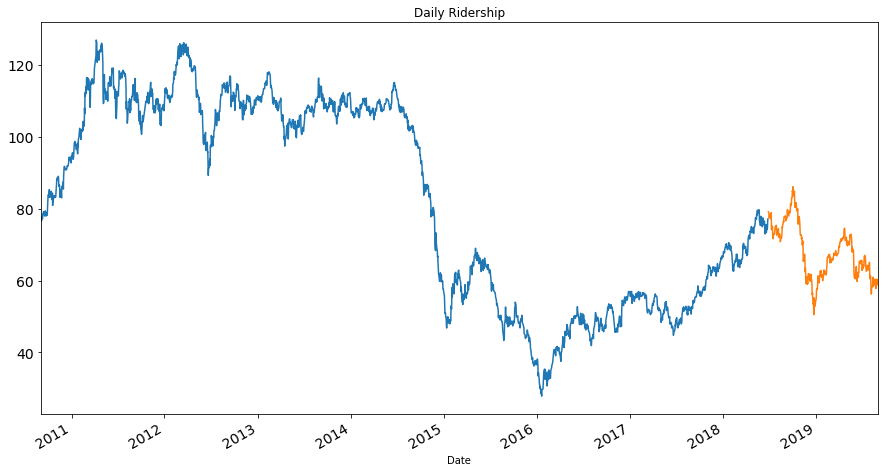

In [44]:
train=data[366:2666] 
test=data[0:365]
train.Value.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Value.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

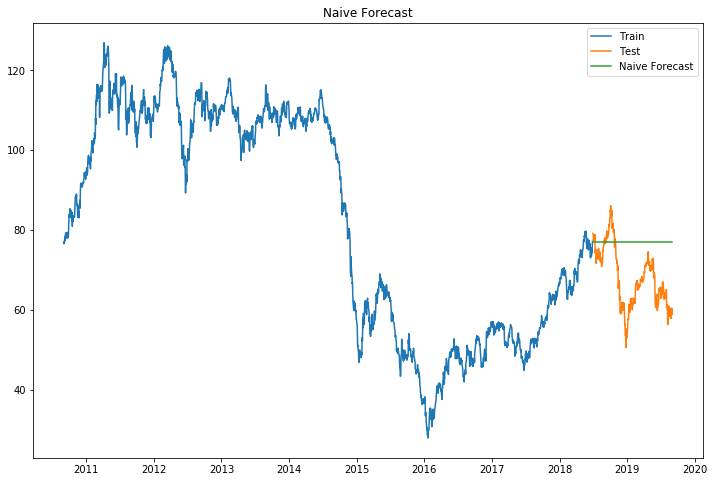

In [45]:
#Start with a Naive Approach
dd= np.asarray(train.Value)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Value'], label='Train')
plt.plot(test.index,test['Value'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.Value, y_hat.naive))
print(rms)

11.486779106719837


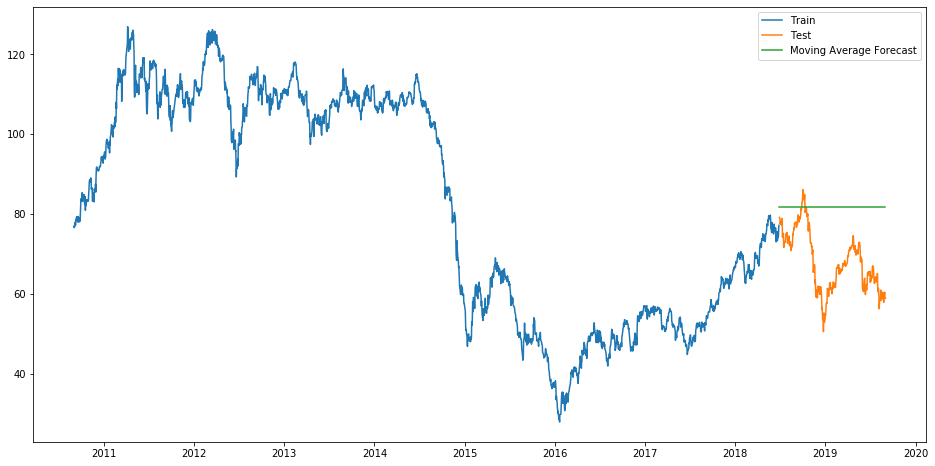

In [47]:
#Moving average
def moving_average(series, n):
    return np.average(series[-n:])

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast']=moving_average(train['Value'], 1)
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Value'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [48]:
rms=sqrt(mean_squared_error(test.Value, y_hat_avg.moving_avg_forecast))
print(rms)

15.511237493468053


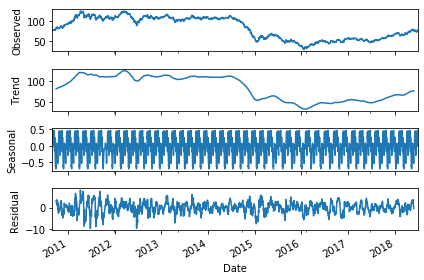

In [49]:
#Holt’s linear trend method
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train.Value,freq=52).plot()
result = sm.tsa.stattools.adfuller(train.Value)
plt.show()

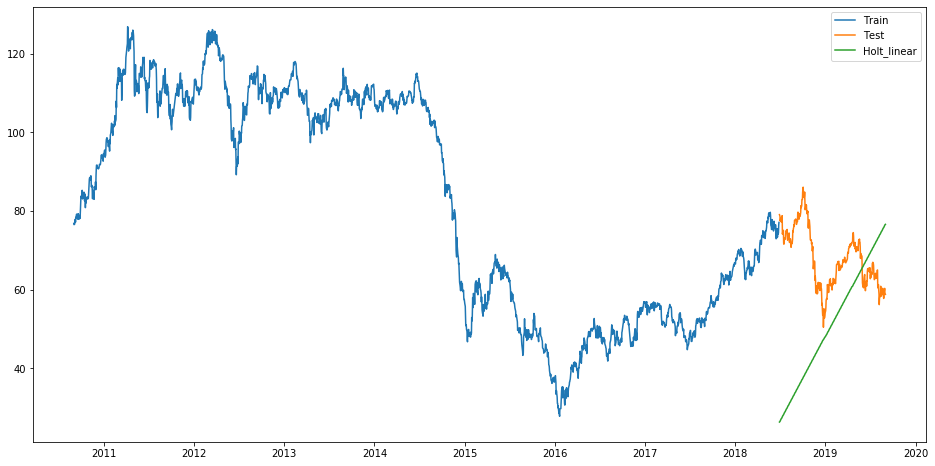

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1=Holt(np.asarray(train['Value'])).fit(smoothing_level=0.8,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [51]:
rms = sqrt(mean_squared_error(test.Value, y_hat_avg.Holt_linear))
print(rms)

25.83684523204595


C:\Users\stwer1998\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


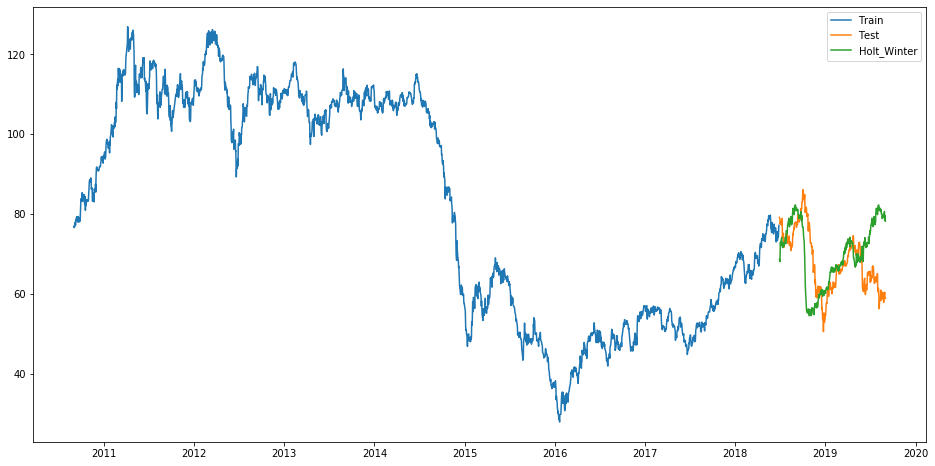

In [52]:
#Holt’s Winter seasonal method
y_hat_avg = test.copy()
fit1=ExponentialSmoothing(np.asarray(train['Value']) ,seasonal_periods=286 , seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [53]:
rms = sqrt(mean_squared_error(test.Value, y_hat_avg.Holt_Winter))
print(rms)

9.99004929833471


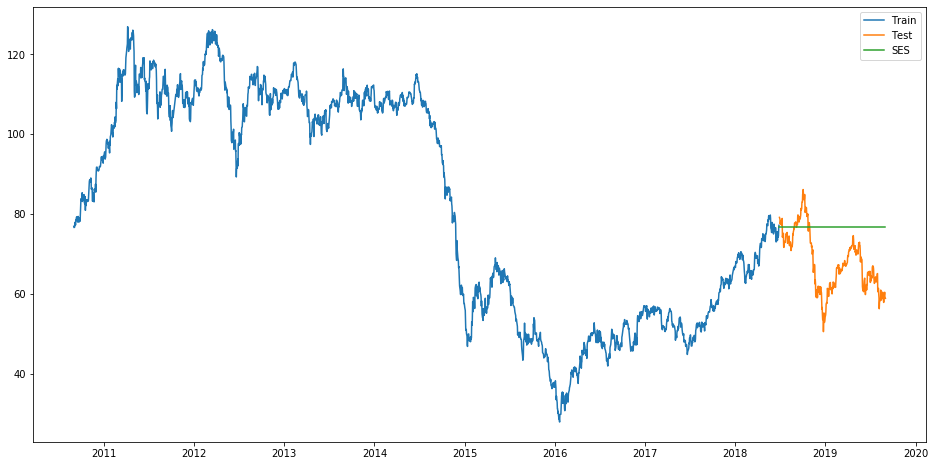

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Value'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [55]:
rms = sqrt(mean_squared_error(test.Value, y_hat_avg.SES))
print(rms)

11.405345133568066


Итог:
1 Start with a Naive Approach 11,48
2 Moving average 15,51
3 Holt’s linear trend method 25,83
4 Holt’s Winter seasonal method 9,99
5 Single Exponential smoothing 11,40